<a href="https://colab.research.google.com/github/Subhranshu-123/assignments/blob/main/bike_sharing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Goal: Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# 1. Importing necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding the data 

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.shape

(730, 16)

In [8]:
df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
df.shape,df.drop_duplicates().shape

((730, 16), (730, 16))

# 3. Cleaning data 

In [12]:
# date column and instant cannot be used as a feature so lets drop it 

df.drop(['dteday', 'instant'], axis = 1, inplace= True)

In [13]:
# we will drop holiday as workingday column fulfills the requirement efficiently.

df.drop(['holiday'], axis = 1, inplace = True)

In [14]:
# Renaming humidity and cnt for easy understanding

df.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [15]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
season_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].map(season_codes)

In [17]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
weathersit_codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(weathersit_codes)


In [19]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [20]:
working_codes = {1:'working_day',0:'Holiday'}
df['workingday'] = df['workingday'].map(working_codes)

In [21]:
df['workingday'].value_counts()

working_day    504
Holiday        226
Name: workingday, dtype: int64

In [22]:
month_codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['mnth'] = df['mnth'].map(month_codes)

In [23]:
df['mnth'].value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [24]:
weekday_codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['weekday'] = df['weekday'].map(weekday_codes)

In [25]:
df['weekday'].value_counts()

Tue    105
Wed    105
Thu    104
Fri    104
Sat    104
Sun    104
Mon    104
Name: weekday, dtype: int64

In [26]:
yr_codes = {0:"2018",1:"2019"}
df['yr'] = df['yr'].map(yr_codes)


In [27]:
df['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [28]:
df.head(5)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,2018,Jan,Tue,working_day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,Wed,working_day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,Thu,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,Fri,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,Sat,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 4. Dividing column into continuous and categorical column 

In [29]:
cont_col =[ 'temp','atemp','humidity','windspeed','casual','registered']

cat_col =['season','yr','mnth','weekday','workingday','weathersit']

tg = ['count']

len(cont_col) + len(cat_col) + len(tg)

13

# 5. Univaraite Analysis

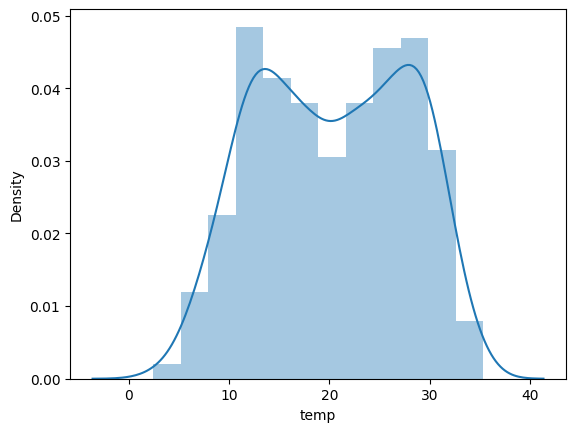

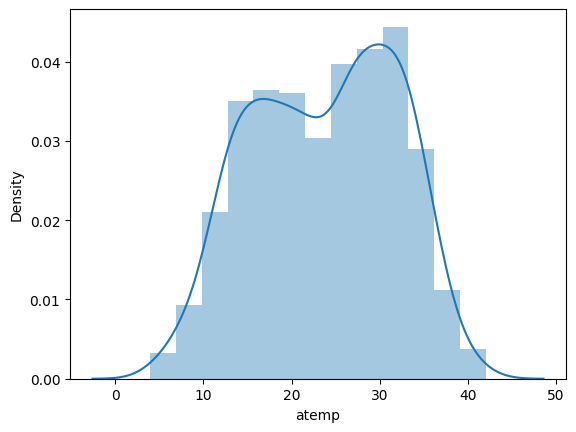

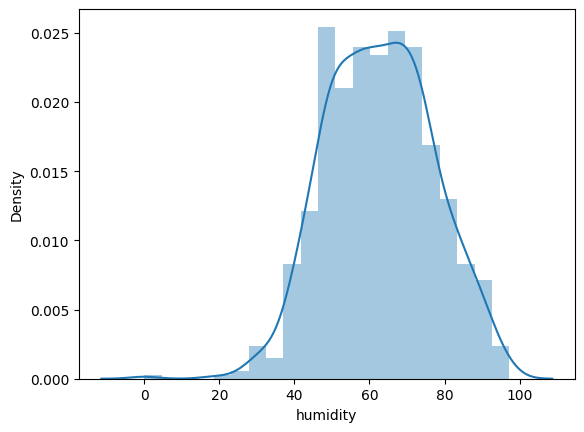

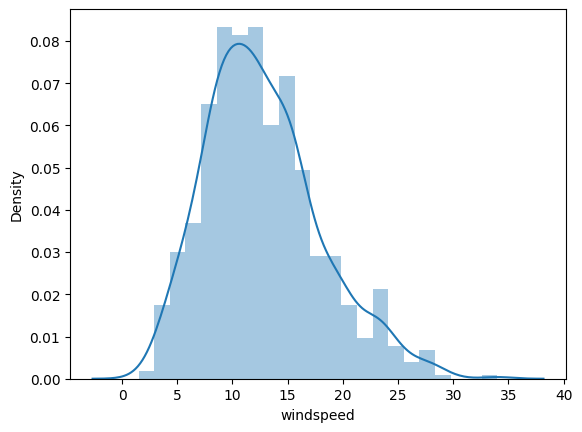

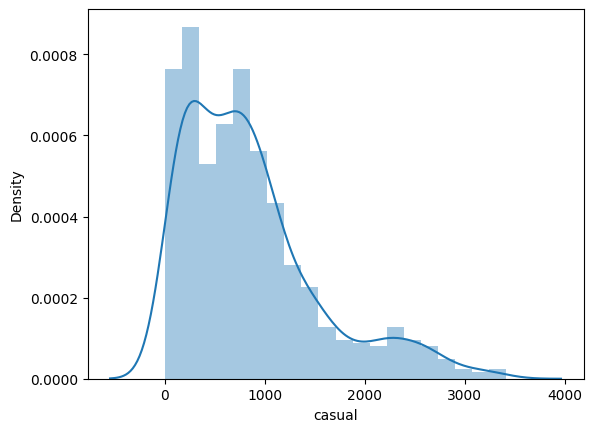

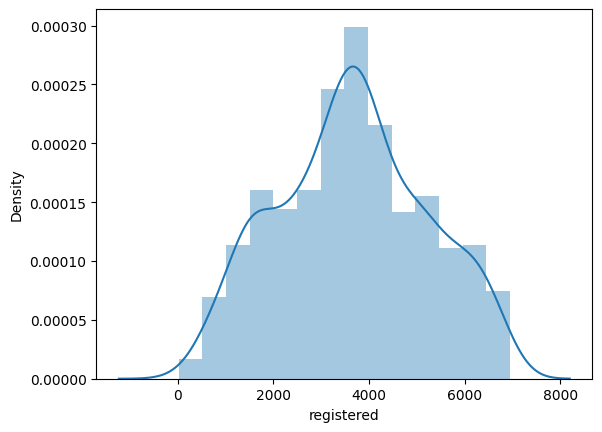

In [30]:
for i in cont_col:
    sns.distplot(df[i])
    plt.show()

#### temp and atemp have similar kind of distribution, some features are showing near by normal distribution while some are skewed

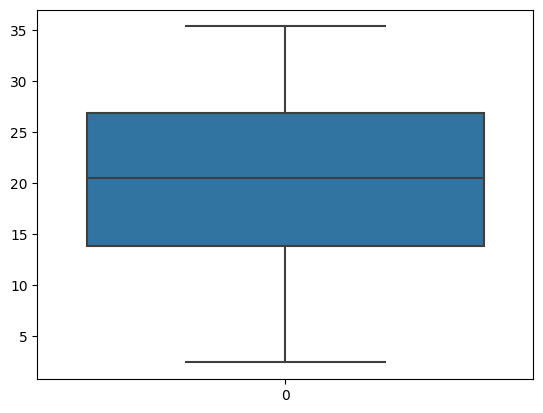

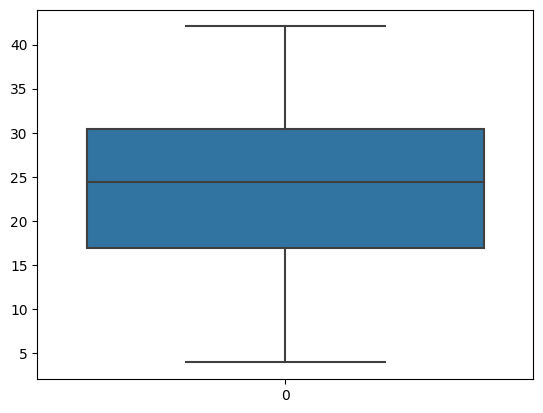

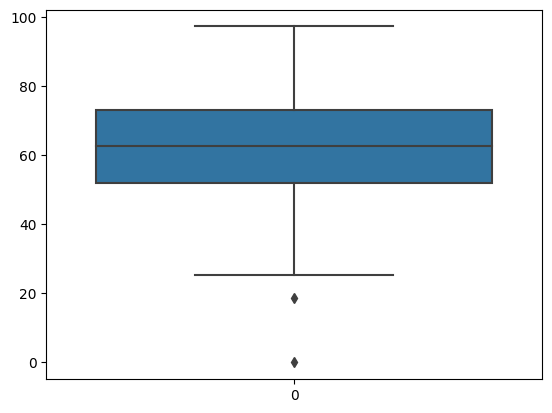

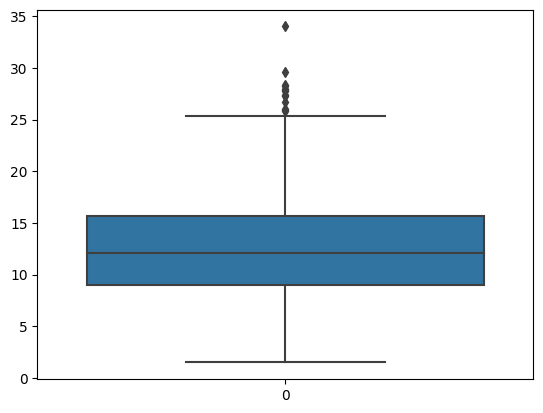

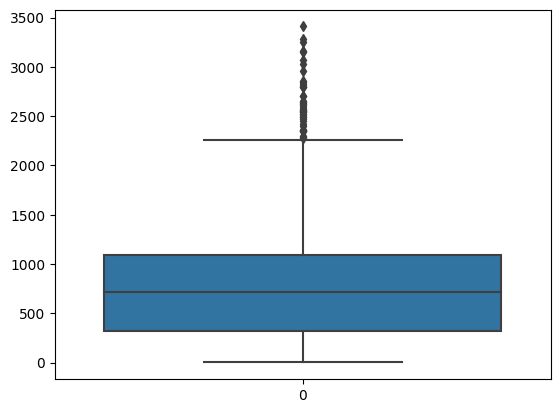

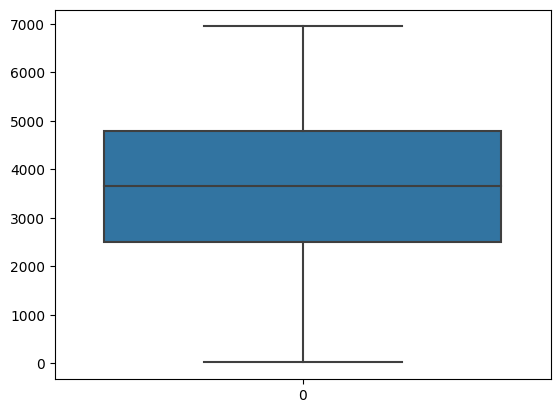

In [31]:
for i in cont_col:
    sns.boxplot(df[i])
    plt.show()

In [32]:
for i in cat_col:
    sns.countplot(df[i])
    plt.show()

ValueError: ignored

In [ ]:
for i in cat_col:
    print(df[i].value_counts())
    print('~~~~~~'*10,'\n\n')

# 6. Bivariate Analysis

In [ ]:
# plotting graph b/w count and continuous columns taking working_day as hue
for i in cont_col:
    sns.scatterplot(df[i], df['count'], hue = df['workingday'])
    plt.show()

In [ ]:
for i in cont_col:
    sns.scatterplot(df[i], df['count'], hue = df['yr'], palette = 'magma_r')
    plt.show()

In [ ]:
for i in cont_col:
    sns.jointplot(df[i], df['count'], kind = 'reg')
    plt.show()

#### temp-atemp-causal-registered showing positive linear distribution while humidity - windspeed showing negative 

In [ ]:
for i in cat_col:
    sns.boxplot(df[i], df['count'])
    plt.show()

In [ ]:
for i in cat_col:
    sns.barplot(df[i], df['count'])
    plt.show()

#### Inference = Bike Rentals increased significantly in the year 2019 ,are more during the Fall(Monsoon) season, during clear weather and from june to september months and on holidays 

In [33]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,2018,Jan,Tue,working_day,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,Wed,working_day,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,Thu,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,Fri,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,Sat,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 7. Plotting heatmap

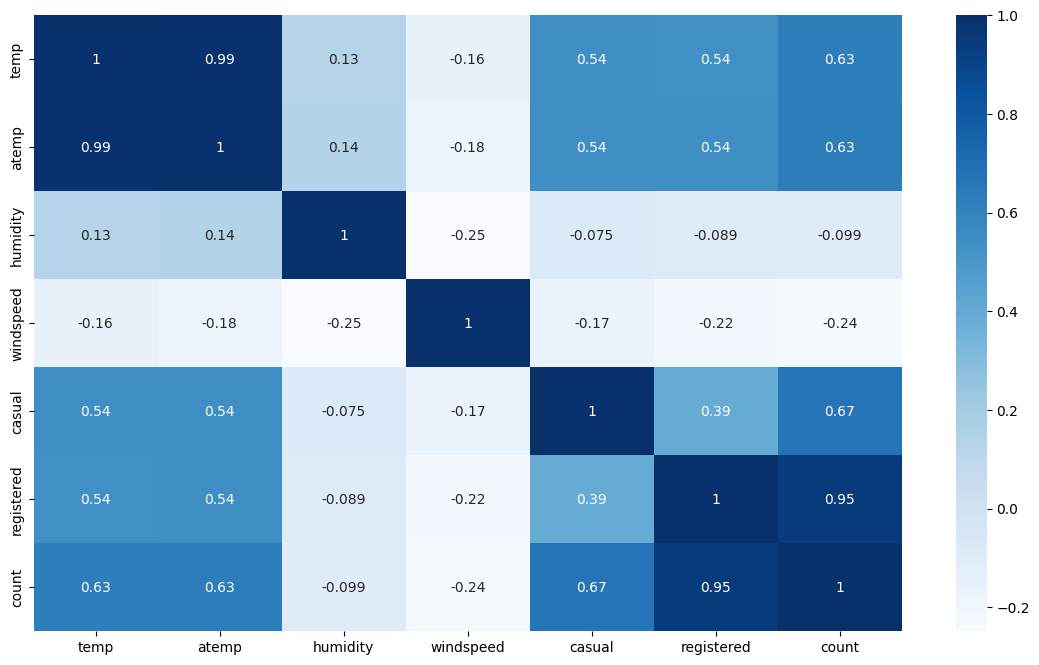

In [34]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

#### temp with atemp & count with registered/casual are highly co-realted , so we will drop them 

In [35]:
df.drop(['atemp'], axis = 1, inplace = True)

In [36]:
df.drop(['registered', 'casual'], axis = 1, inplace = True)

In [37]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,Tue,working_day,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Wed,working_day,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600


In [ ]:
# plotting pairplot
sns.pairplot(df)
plt.show()

# 8. Pre processing steps

In [38]:
yr_code = {'2018':0,'2019':1}
df['yr'] = df['yr'].map(yr_code)

In [39]:
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [40]:
working_code = {'working_day':1,'Holiday':0}
df['workingday'] = df['workingday'].map(working_code)

In [41]:
df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [42]:
df.head(2)

,season,yr,mnth,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,Tue,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Wed,1,Mist,14.902598,69.6087,16.652113,801


In [43]:
# columns on which dummy variables will be made

cat_col = ['season','yr','weekday','mnth','workingday','weathersit']
df[cat_col].nunique()

season         4
yr             2
weekday        7
mnth          12
workingday     2
weathersit     3
dtype: int64

## 9.Dummy variable creation

In [44]:
dummy = pd.get_dummies(df[['season','weekday','mnth', 'weathersit']], drop_first = True)

In [45]:
dummy

,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,mnth_Aug,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df = pd.concat([df,dummy], axis = 1)

In [47]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,humidity,windspeed,count,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
0,spring,0,Jan,Tue,1,Mist,14.110847,80.5833,10.749882,985,...,1,0,0,0,0,0,0,0,0,1
1,spring,0,Jan,Wed,1,Mist,14.902598,69.6087,16.652113,801,...,1,0,0,0,0,0,0,0,0,1
2,spring,0,Jan,Thu,1,Clear,8.050924,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,Jan,Fri,1,Clear,8.200000,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,Jan,Sat,1,Clear,9.305237,43.6957,12.522300,1600,...,1,0,0,0,0,0,0,0,0,0


In [48]:
df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

In [49]:
df.head(2)

,yr,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# 10. Splitting the Data into Training and Testing Sets

In [50]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','humidity','windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
653,1,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
728,1,1,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


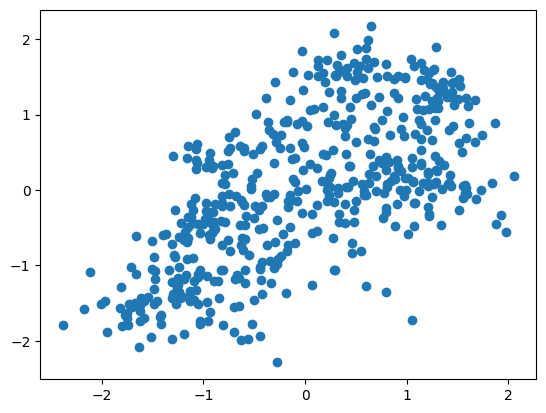

In [53]:
plt.scatter('temp','count',data=df_train)

In [ ]:
df_train.describe()

# 11. Dividing into X and Y sets for the model building

In [54]:
y_train = df_train.pop('count')
X_train = df_train

In [55]:
y_train.head()

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
Name: count, dtype: float64

In [56]:
X_train.head()

,yr,workingday,temp,humidity,windspeed,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
653,1,1,-0.121335,-0.514725,-0.117752,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,1,1.231731,0.516433,-0.330615,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,-0.420478,-0.069854,-0.385694,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,1,-1.294913,-1.045032,2.018143,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,-0.627580,-1.000840,-0.779889,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# 12.Building our model

### Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [57]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm) 
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', False, 7),
 ('windspeed', False, 5),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 8),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [64]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'workingday', 'temp', 'season_spring', 'season_winter',
       'weekday_Mon', 'weekday_Sun', 'mnth_Dec', 'mnth_July', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'season_summer', 'weekday_Sat', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [66]:
X_train_rfe = X_train[columns]

In [67]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          2.80e-178
Time:                        12:45:13   Log-Likelihood:                -278.94
No. Observations:                 510   AIC:                             585.9
Df Residuals:                     496   BIC:                             645.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6753      0.136     -4.950      0.000      -0.943      -0.407
yr                        1.0408      0.038     27.443      0.000       0.966       1.115
workingday                0.3707      0.131      2.831      0.005       0.113       0.628
temp                      0.4540      0.032     14.061      0.000       0.391       0.517
season_spring            -0.5161      0.070     -7.340      0.000      -0.654      -0.378
season_winter             0.3348      0.065      5.126      0.000       0.206       0.463
weekday_Mon               0.4648      0.139      3.348      0.001       0.192       0.738
weekday_Sun               0.4509      0.139      3.240      0.001       0.177       0.724
mnth_Dec                 -0.1491      0.079     -1.895      0.059      -0.304       0.006
mnth_July                -0.2969      0.080     -3.706      0.000      -0.454      -0.140
mnth_Nov                 -0.2189      0.086     -2.533      0.012      -0.389      -0.049
mnth_Sep                  0.2699      0.073      3.713      0.000       0.127       0.413
weathersit_Light Snow    -1.3590      0.114    -11.941      0.000      -1.583      -1.135
weathersit_Mist          -0.3634      0.041     -8.963      0.000      -0.443      -0.284
==============================================================================
Omnibus:                       81.475   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.602
Skew:                          -0.791   Prob(JB):                     9.24e-48
Kurtosis:                       5.773   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.80
2,workingday,9.98
6,weekday_Mon,6.48
7,weekday_Sun,6.19
3,temp,2.96
4,season_spring,2.58
5,season_winter,2.26
10,mnth_Nov,1.67
8,mnth_Dec,1.36
9,mnth_July,1.29


In [71]:
X_train_1 = X_train_rfe.drop(['workingday'], axis=1)

In [72]:
X_train_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train,X_train_1).fit() 

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.03e-177
Time:                        12:45:18   Log-Likelihood:                -283.03
No. Observations:                 510   AIC:                             592.1
Df Residuals:                     497   BIC:                             647.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3096      0.044     -6.999      0.000      -0.397      -0.223
yr                        1.0395      0.038     27.219      0.000       0.964       1.115
temp                      0.4523      0.033     13.911      0.000       0.388       0.516
season_spring            -0.5308      0.071     -7.517      0.000      -0.670      -0.392
season_winter             0.3344      0.066      5.085      0.000       0.205       0.464
weekday_Mon               0.1045      0.056      1.868      0.062      -0.005       0.215
weekday_Sun               0.0911      0.057      1.594      0.112      -0.021       0.203
mnth_Dec                 -0.1534      0.079     -1.936      0.053      -0.309       0.002
mnth_July                -0.2925      0.081     -3.627      0.000      -0.451      -0.134
mnth_Nov                 -0.2342      0.087     -2.698      0.007      -0.405      -0.064
mnth_Sep                  0.2543      0.073      3.483      0.001       0.111       0.398
weathersit_Light Snow    -1.3505      0.115    -11.788      0.000      -1.576      -1.125
weathersit_Mist          -0.3609      0.041     -8.841      0.000      -0.441      -0.281
==============================================================================
Omnibus:                       84.227   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.969
Skew:                          -0.817   Prob(JB):                     2.32e-49
Kurtosis:                       5.805   Cond. No.                         7.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_train_2 = X_train_1.drop(['weekday_Sun'], axis=1)

In [74]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.31
2,temp,2.95
3,season_spring,2.57
4,season_winter,2.26
8,mnth_Nov,1.66
6,mnth_Dec,1.36
7,mnth_July,1.29
9,mnth_Sep,1.10
10,weathersit_Light Snow,1.05
11,weathersit_Mist,1.05


In [75]:
X_train_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train, X_train_2). fit()

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.3
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          2.47e-178
Time:                        12:45:26   Log-Likelihood:                -284.33
No. Observations:                 510   AIC:                             592.7
Df Residuals:                     498   BIC:                             643.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2973      0.044     -6.815      0.000      -0.383      -0.212
yr                        1.0385      0.038     27.154      0.000       0.963       1.114
temp                      0.4541      0.033     13.956      0.000       0.390       0.518
season_spring            -0.5284      0.071     -7.473      0.000      -0.667      -0.389
season_winter             0.3323      0.066      5.046      0.000       0.203       0.462
weekday_Mon               0.0907      0.055      1.637      0.102      -0.018       0.199
mnth_Dec                 -0.1510      0.079     -1.903      0.058      -0.307       0.005
mnth_July                -0.2935      0.081     -3.634      0.000      -0.452      -0.135
mnth_Nov                 -0.2307      0.087     -2.654      0.008      -0.402      -0.060
mnth_Sep                  0.2553      0.073      3.492      0.001       0.112       0.399
weathersit_Light Snow    -1.3428      0.115    -11.713      0.000      -1.568      -1.118
weathersit_Mist          -0.3577      0.041     -8.760      0.000      -0.438      -0.277
==============================================================================
Omnibus:                       83.384   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.078
Skew:                          -0.801   Prob(JB):                     4.91e-50
Kurtosis:                       5.849   Cond. No.                         7.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X_train_3 = X_train_2.drop(['weekday_Mon'], axis=1)

In [77]:
X_train_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train, X_train_3). fit()

lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          6.04e-179
Time:                        12:45:31   Log-Likelihood:                -285.70
No. Observations:                 510   AIC:                             593.4
Df Residuals:                     499   BIC:                             640.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2871      0.043     -6.638      0.000      -0.372      -0.202
yr                        1.0395      0.038     27.141      0.000       0.964       1.115
temp                      0.4538      0.033     13.923      0.000       0.390       0.518
season_spring            -0.5284      0.071     -7.461      0.000      -0.668      -0.389
season_winter             0.3311      0.066      5.019      0.000       0.201       0.461
mnth_Dec                 -0.1459      0.079     -1.837      0.067      -0.302       0.010
mnth_July                -0.2882      0.081     -3.564      0.000      -0.447      -0.129
mnth_Nov                 -0.2355      0.087     -2.706      0.007      -0.407      -0.065
mnth_Sep                  0.2566      0.073      3.503      0.001       0.113       0.400
weathersit_Light Snow    -1.3470      0.115    -11.732      0.000      -1.573      -1.121
weathersit_Mist          -0.3529      0.041     -8.651      0.000      -0.433      -0.273
==============================================================================
Omnibus:                       79.085   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.066
Skew:                          -0.751   Prob(JB):                     6.01e-49
Kurtosis:                       5.863   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.20
2,temp,2.95
3,season_spring,2.57
4,season_winter,2.26
7,mnth_Nov,1.66
5,mnth_Dec,1.35
6,mnth_July,1.28
8,mnth_Sep,1.10
9,weathersit_Light Snow,1.05
10,weathersit_Mist,1.04


#### Residual Analysis of the train data
#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), plotting the histogram of the error terms to see what it looks like.

In [79]:
y_train_count = lm_3.predict(X_train_3)

Text(0.5, 0, 'Errors')

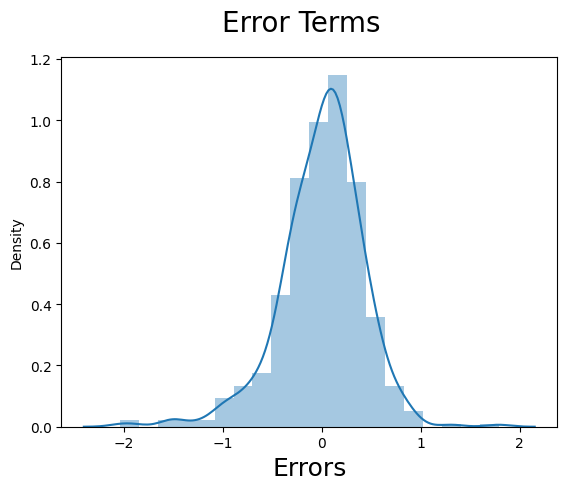

In [80]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# 13. Working on test data 

In [81]:
num_vars = ['temp','humidity','windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [82]:
y_test = df_test.pop('count')
X_test = df_test

In [83]:
X_train_3.drop(['const'] ,axis=1, inplace=True)

In [84]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# 14. Making predictions


In [85]:
y_pred = lm_3.predict(X_test_new)

# 15. Model Evaluation

Text(0, 0.5, 'y_pred')

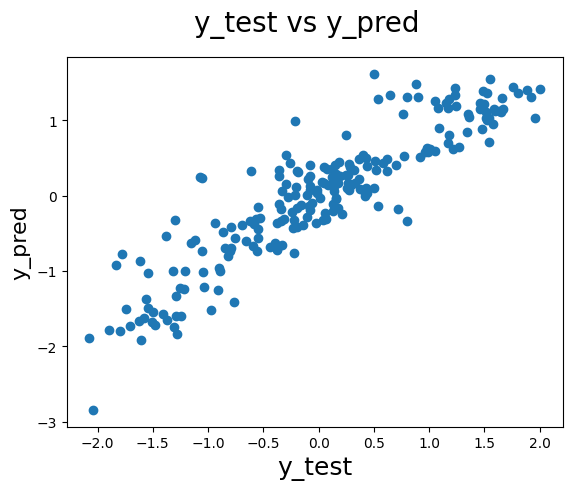

In [86]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

# 16. Observing r2_score value 

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8194113545529464

In [ ]:
from google.colab import drive
drive.mount('/content/drive')